 <a id="1">Introduction</a>  

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there have not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.  



### Loading necessary libraries

In [38]:
import pandas as pd
pd.set_option ( "display.max_rows" , None )
pd.set_option ( "display.max_columns" , None )
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ( "ignore" )

### Loading the Data

In [39]:
data = pd.read_csv ( "creditcard.csv" )
data.head ( )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
# Number of Records and Features
print ( "Rows:" , data.shape [ 0 ] )
print ( "Columns:" , data.shape [ 1 ] )

Rows: 284807
Columns: 31


In [41]:
# Feature names with their data types and null values (if any)
pd.DataFrame ( { "Feature" : data.columns , "Data Type" : list ( data.dtypes ) , \
     "Null Values" : list ( data.isnull ( ).sum ( ) ) } )

,Feature,Data Type,Null Values
0,Time,float64,0
1,V1,float64,0
2,V2,float64,0
3,V3,float64,0
4,V4,float64,0
5,V5,float64,0
6,V6,float64,0
7,V7,float64,0
8,V8,float64,0
9,V9,float64,0


In [42]:
# Descriptive statistics
data.describe ( )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


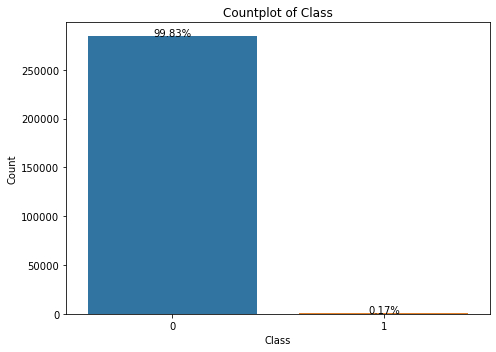

In [43]:
plt.rcParams [ "figure.figsize" ] = [ 7 , 5 ]
plt.rcParams [ "figure.autolayout" ] = True

counts = data [ "Class" ].value_counts ( )
ax = sns.barplot ( x = counts.index  , y = list ( counts ) )
percentage = list ( np.array ( list ( counts ) ) / data.shape [ 0 ] * 100 )
patches = ax.patches
for i in range ( len ( patches ) ):
    x = patches [ i ].get_x ( ) + patches [ i ].get_width ( ) / 2
    y = patches [ i ].get_height ( ) + 0.05
    ax.annotate ( '{:.2f}%' .format ( percentage [ i ] ) 
                    , ( x , y ) , ha = 'center' )
                    
plt.title ( "Countplot of Class" )
plt.xlabel ( "Class" )
plt.ylabel ( "Count" )
plt.xticks ( rotation = 0 )
plt.show ( )

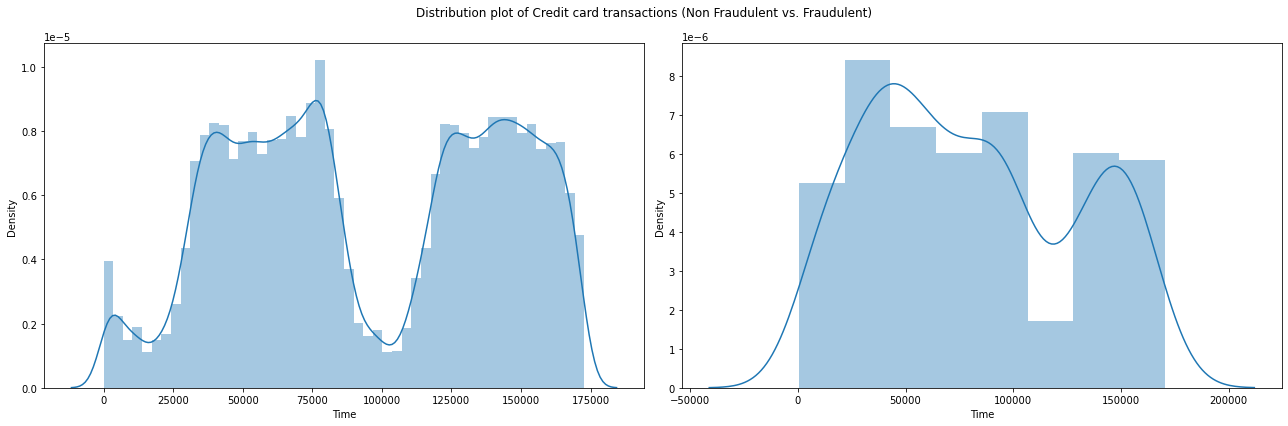

In [44]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.distplot ( data [ data [ "Class" ] == 0 ] [ "Time" ] , ax = ax1 )
s = sns.distplot ( data [ data [ "Class" ] == 1 ] [ "Time" ] , ax = ax2 )

plt.suptitle ( "Distribution plot of Credit card transactions (Non Fraudulent vs. Fraudulent)" )

plt.show ( )

Fraudulent transactions have a distribution which is more even than the valid transactions.

Let's look into more details of the time distribution for both the classes as well as aggregated values of transaction count and amount per hour. We know (based on observation of the time distribution of transactions) that the time unit is in seconds.

In [46]:
data [ "Hour" ] = data [ "Time" ].apply ( lambda x : np.floor ( x  / 3600 ) )

df = data.groupby ( [ "Hour" , "Class" ] ) [ "Amount" ].agg ( [ "min" , "max" , "count" , "sum" , "mean" , "median" , "var" ] ).reset_index ( )
df.head ( )

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


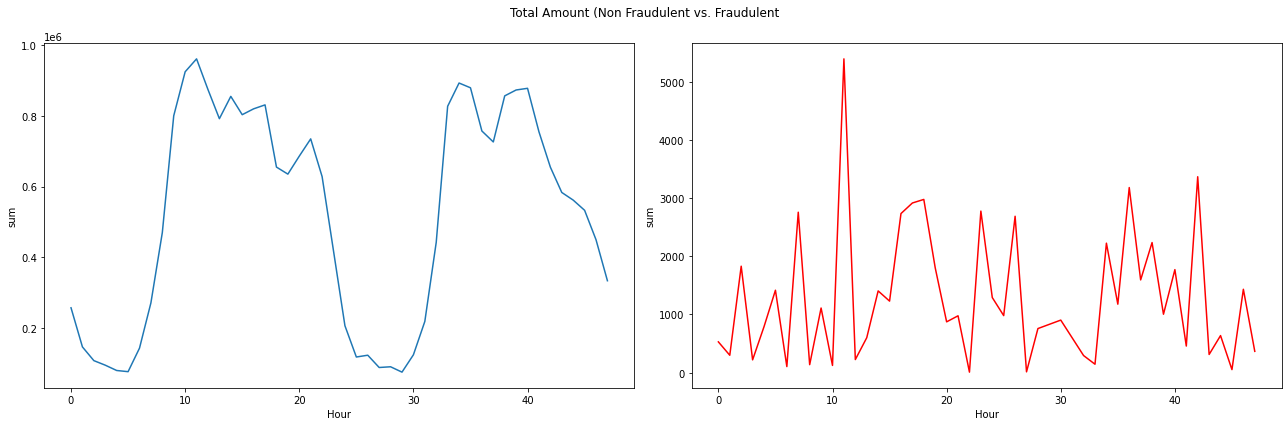

In [51]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "sum" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "sum" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Total Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

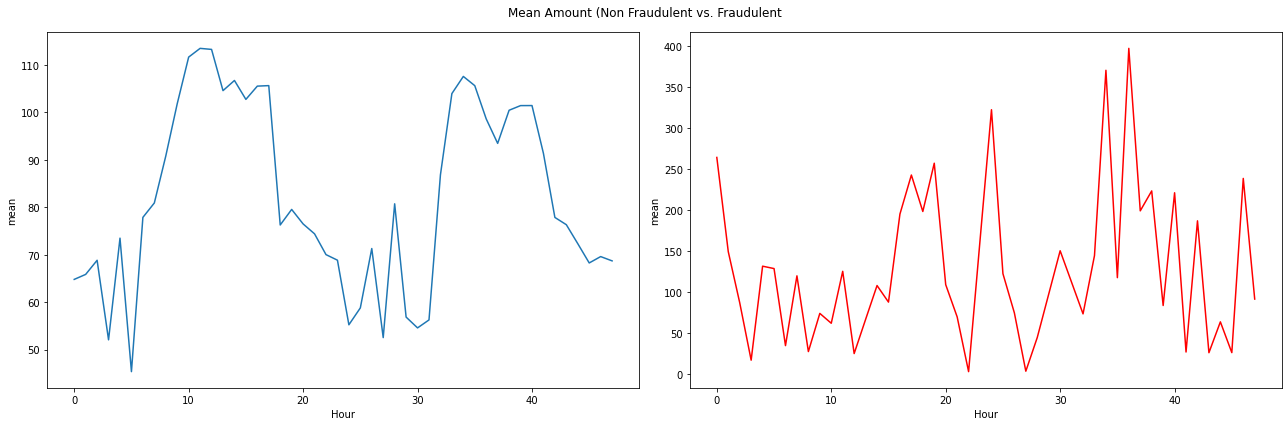

In [55]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "mean" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "mean" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Mean Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

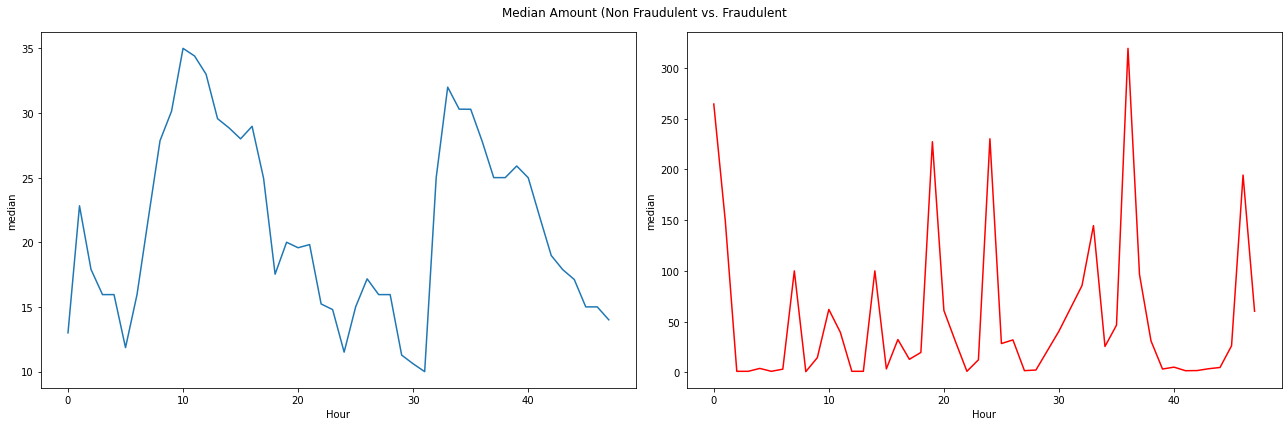

In [54]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "median" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "median" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Median Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

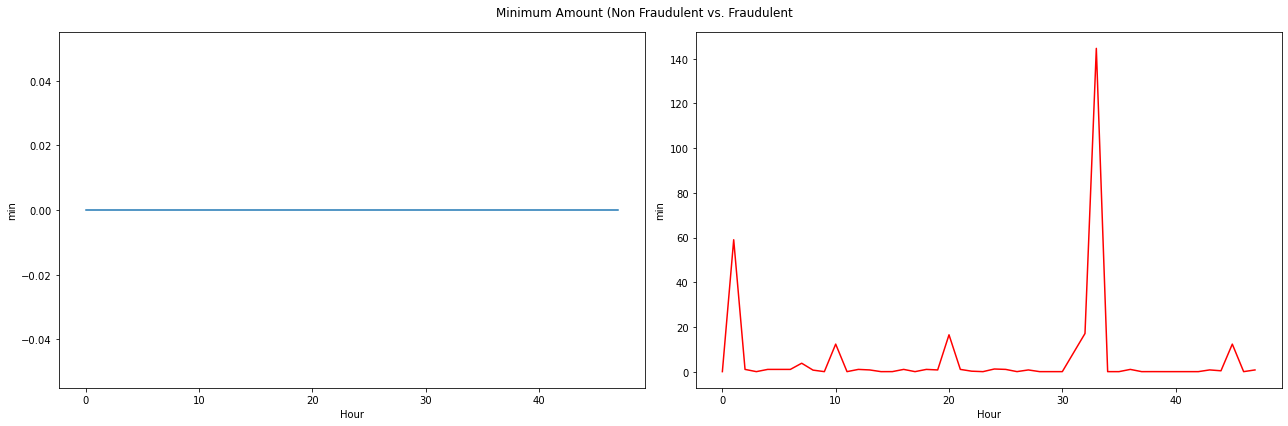

In [53]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "min" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "min" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Minimum Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

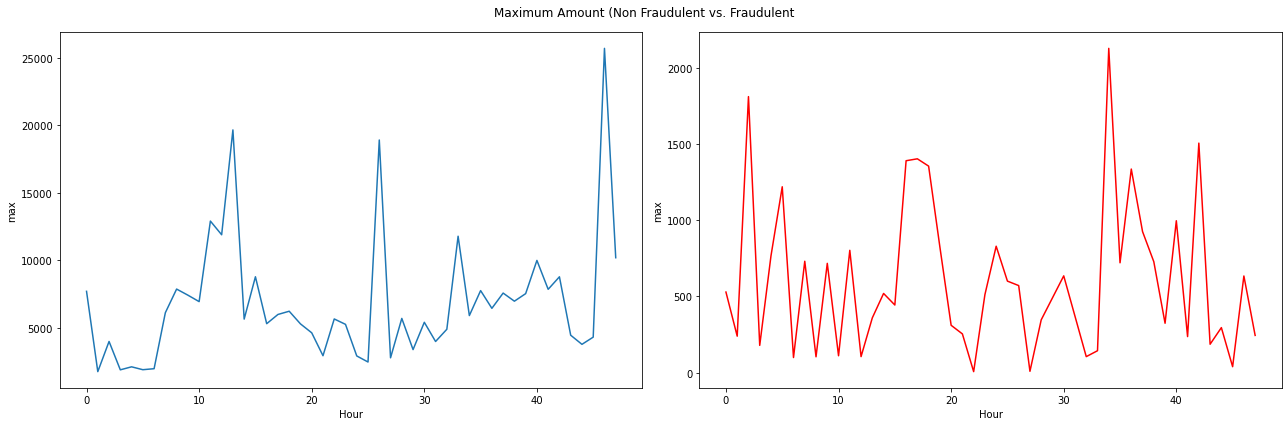

In [52]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 18 , 6 ) )
s = sns.lineplot ( ax = ax1 , x = "Hour" , y = "max" , data = df [ df.Class == 0 ] )
s = sns.lineplot ( ax = ax2 , x = "Hour" , y = "max" , data = df [ df.Class ==1 ] , color = "red" )
plt.suptitle ( "Maximum Amount (Non Fraudulent vs. Fraudulent" )
plt.show ( )

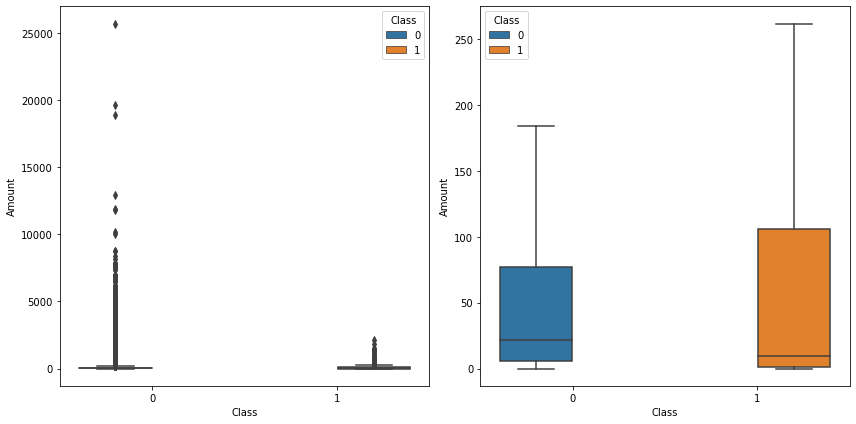

In [68]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols = 2 , figsize = ( 12 , 6 ) )
s = sns.boxplot ( ax = ax1 , y = data [ "Amount" ] , x = data [ "Class" ] , hue = data [ "Class" ] , showfliers = True )
s = sns.boxplot ( ax = ax2 , y = data [ "Amount" ] , x = data [ "Class" ] , hue = data [ "Class" ] , showfliers = False )
plt.show ( )